### K-mean

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('./data/KMeansData.csv')
X = df.iloc[:, :].values

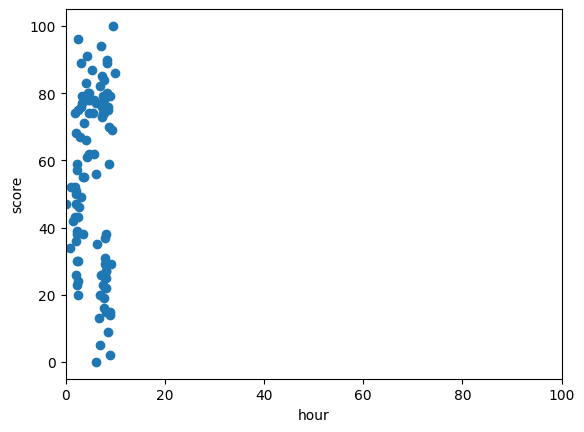

In [32]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hour')
plt.ylabel('score')
plt.xlim(0, 100)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

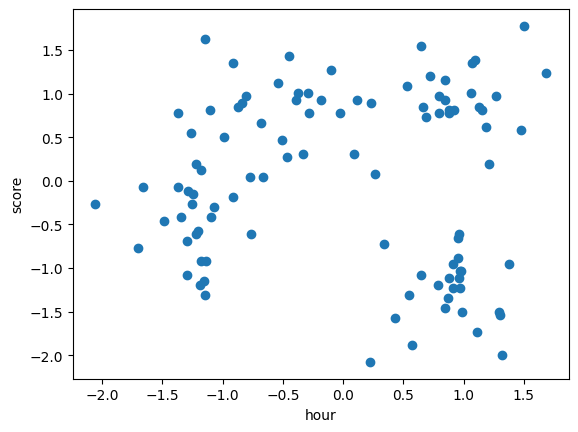

In [34]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

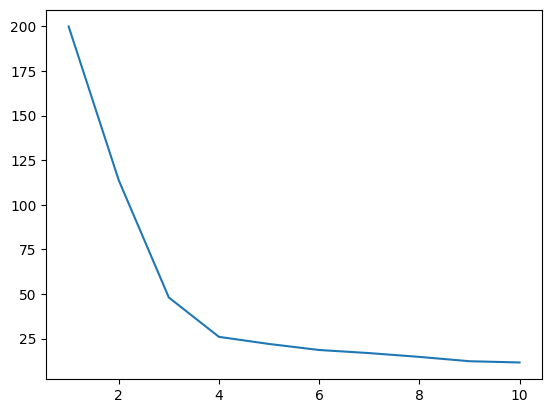

In [35]:
from sklearn.cluster import KMeans

center_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    center_list.append(kmeans.inertia_) #중심점까지의평균거리
    
plt.plot(range(1, 11), center_list)
plt.show()

In [36]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
group = kmeans.fit_predict(X)
group

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [37]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

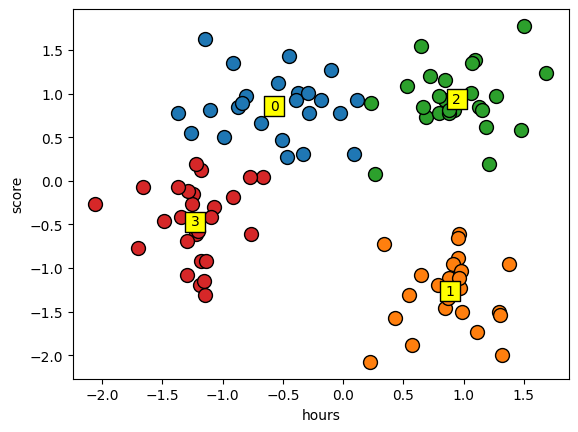

In [38]:
for cluster in range(4):
    plt.scatter(X[group==cluster, 0], X[group==cluster, 1],s=100, ec='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=200, ec='black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [42]:
X_origin = sc.inverse_transform(X)
centers_origin = sc.inverse_transform(centers)

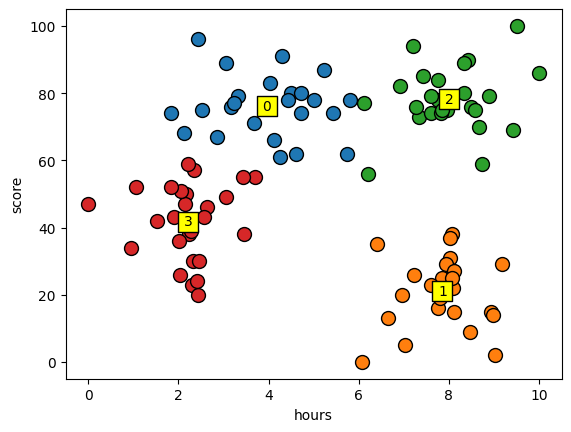

In [43]:
for cluster in range(4):
    plt.scatter(X_origin[group==cluster, 0], X_origin[group==cluster, 1],s=100, ec='black')
    plt.scatter(centers_origin[cluster, 0], centers_origin[cluster, 1], s=200, ec='black', color='yellow', marker='s')
    plt.text(centers_origin[cluster, 0], centers_origin[cluster, 1], cluster, va='center', ha='center')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()